In [1]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# dataset1
## transfer date only need month and year.

In [2]:
def tran_date(df):
    df['Date'] = pd.to_datetime(df["DATE (YYYY-MM-DDTHH:MI:SSZ)"], format='%Y-%m-%dT%H:%M:%SZ')
    df['Year_Month'] = df['Date'].dt.strftime('%Y-%m')
    #print(df)

## find the amount instance with same period of time

In [3]:
def find_value(df, column_name, target_value):
    target_index = df.index[df[column_name] == target_value]
    
    if len(target_index) == 0:
        return 0
    rows_after_target = len(df) - target_index[0] - 1
    return rows_after_target


## drop columns

In [4]:
input_path = './dataset1/S2A/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename)
        tran_date(df)
        amount=find_value(df, 'Year_Month', '2019-03')
        print(amount)
        length=len(df)
        print(length-amount)
        df=df[length-amount:]
        df=df[['DATE (YYYY-MM-DDTHH:MI:SSZ)', 'DATE_QC',
       'LATITUDE (degree_north)', 'LONGITUDE (degree_east)', 'POSITION_QC',
       'PRES (decibar)', 'PRES_QC', 'PSAL (psu)', 'PSAL_QC',
       'TEMP (degree_Celsius)', 'TEMP_QC']]
        print(df.isna().sum())
        df= df.dropna()
        print(df.isna().sum())
        df.to_csv(file_path, index=False)

PR_PF_4902338.csv
205377
1
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)                 0
PRES_QC                        0
PSAL (psu)                     0
PSAL_QC                        0
TEMP (degree_Celsius)          0
TEMP_QC                        0
dtype: int64
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)                 0
PRES_QC                        0
PSAL (psu)                     0
PSAL_QC                        0
TEMP (degree_Celsius)          0
TEMP_QC                        0
dtype: int64
PR_PF_4903218.csv
278362
1
DATE (YYYY-MM-DDTHH:MI:SSZ)    0
DATE_QC                        0
LATITUDE (degree_north)        0
LONGITUDE (degree_east)        0
POSITION_QC                    0
PRES (decibar)               

## generate label

In [5]:
def flag_qc(df):
    qc_values = []  # 存储QC列的值
    for i, row in df.iterrows():
        values = row[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC']]
        if all(v in [0, 1] for v in values):
            qc_values.append(0)
        else:
            qc = pd.NA
            if values['DATE_QC'] not in [0, 1]:
                qc = 1
            if values['POSITION_QC'] not in [0, 1]:
                qc = 2
            if values['PRES_QC'] not in [0, 1]:
                qc = 3
            if values['PSAL_QC'] not in [0, 1]:
                qc = 4
            if values['TEMP_QC'] not in [0, 1]:
                qc = 5
            qc_values.append(qc)
    df['QC'] = qc_values
    return df

In [6]:
def flag_label(df):
    label_values = []  # 存储QC列的值
    for i, row in df.iterrows():
        values = row[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC']]
        if all(v in [0, 1] for v in values):
            label_values.append(0)
        else:
            label_values.append(1)
    df['Label'] = label_values
    return df

# EDA

In [7]:
def allqc(df):
    non_binary_rows = df.loc[~df[['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC','TEMP_QC',]].isin([0, 1]).all(axis=1)]
    percentage = len(non_binary_rows) / len(df)
    print(f"low quality data precentage: {percentage:.10%}")

In [8]:
def oneqc(df):
    non_binary_rows = df.loc[df[['QC']].isin([0]).all(axis=1)]
    percentage = len(non_binary_rows) / len(df)
    print(f"high quality data precentage: {percentage:.10%}")

In [9]:
def plot_qc_distribution(df):
    qc_counts = df['QC'].value_counts()
    qc_counts.plot(kind='bar')
    plt.xlabel('QC Values')
    plt.ylabel('Count')
    plt.title('QC Value Distribution')
    plt.show()


In [10]:
def find_non_binary_values(df, columns):
    result = []
    for column in columns:
        non_binary_values = df[(df[column] != 0) & (df[column] != 1)& (~df[column].isna())][column]
        if not non_binary_values.empty:
            for index, value in non_binary_values.items():
                result.append((column, value, index))
    return result

PR_PF_4902338.csv 205377
low quality data precentage: 0.0038952755%
high quality data precentage: 99.9961047245%


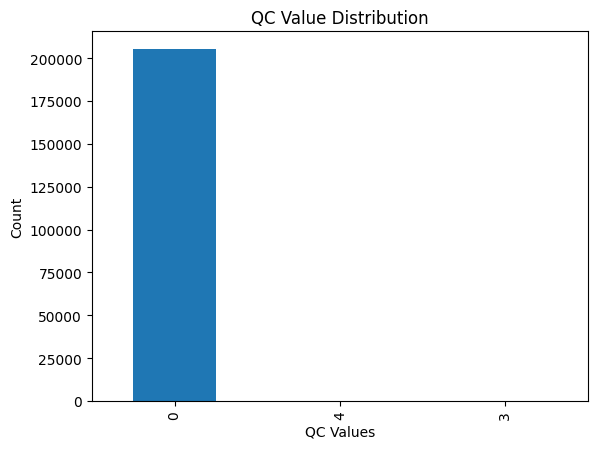

PR_PF_4903218.csv 278362
low quality data precentage: 0.8647013601%
high quality data precentage: 99.1352986399%


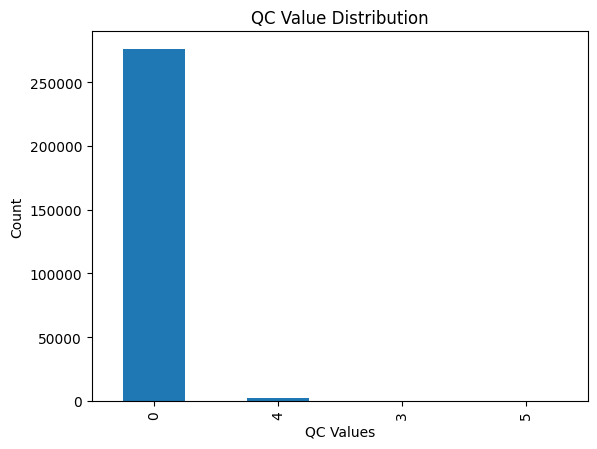

PR_PF_4902919.csv 275911
low quality data precentage: 14.3937719047%
high quality data precentage: 85.6062280953%


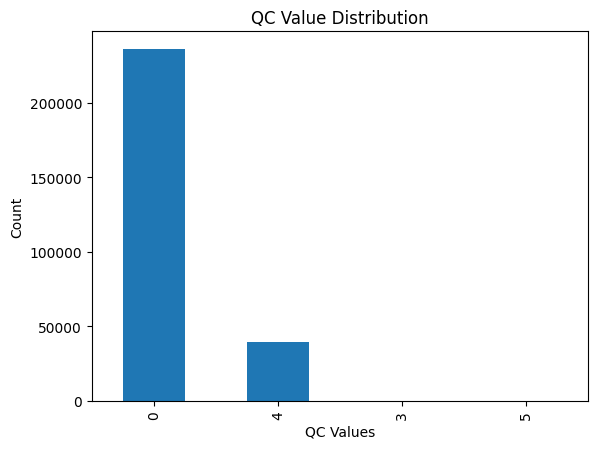

PR_PF_4902100.csv 112696
low quality data precentage: 0.0000000000%
high quality data precentage: 100.0000000000%


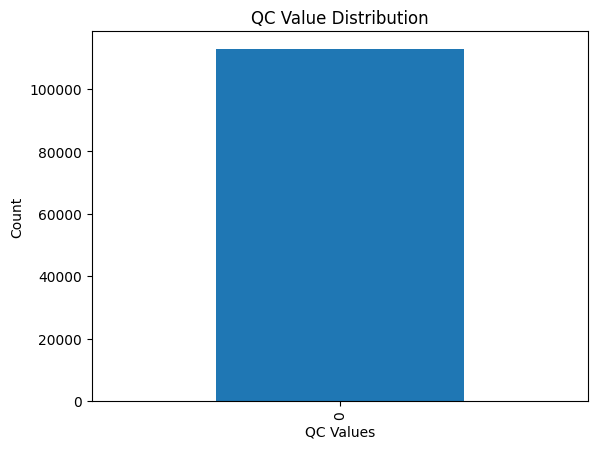

PR_PF_4903220.csv 281402
low quality data precentage: 0.1648886646%
high quality data precentage: 99.8351113354%


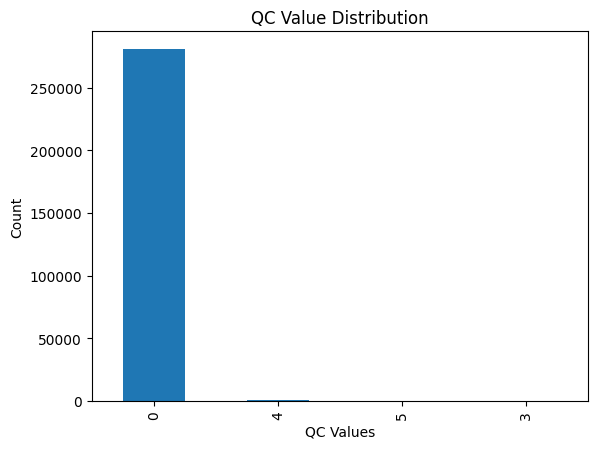

PR_PF_4902911.csv 150254
low quality data precentage: 99.9966723016%
high quality data precentage: 0.0033276984%


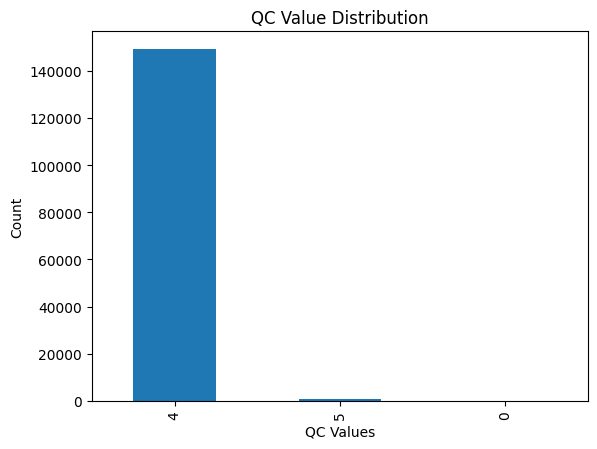

PR_PF_4903216.csv 280370
low quality data precentage: 0.1551521204%
high quality data precentage: 99.8448478796%


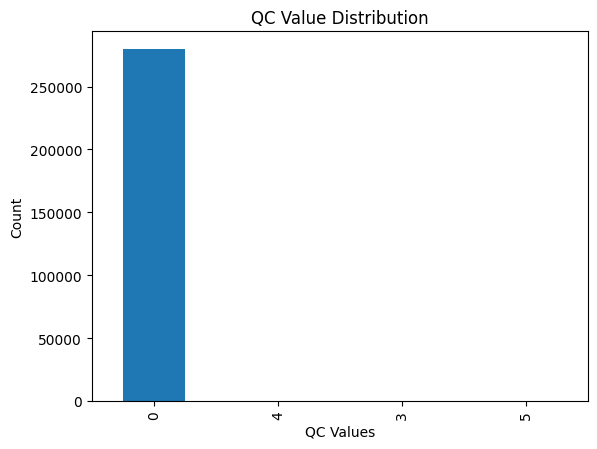

PR_PF_4902337.csv 214897
low quality data precentage: 0.0818997008%
high quality data precentage: 99.9181002992%


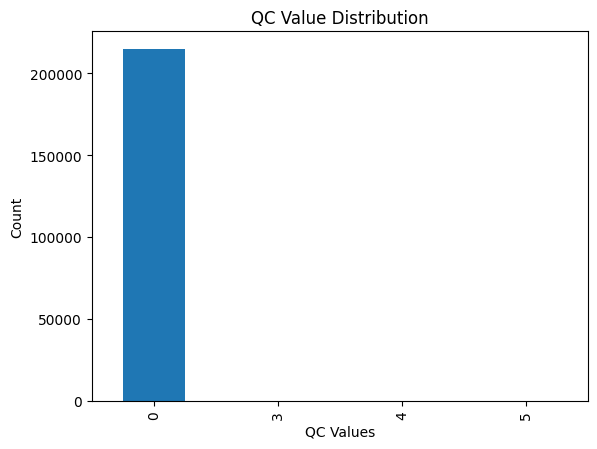

PR_PF_4903217.csv 282147
low quality data precentage: 29.7050828114%
high quality data precentage: 70.2949171886%


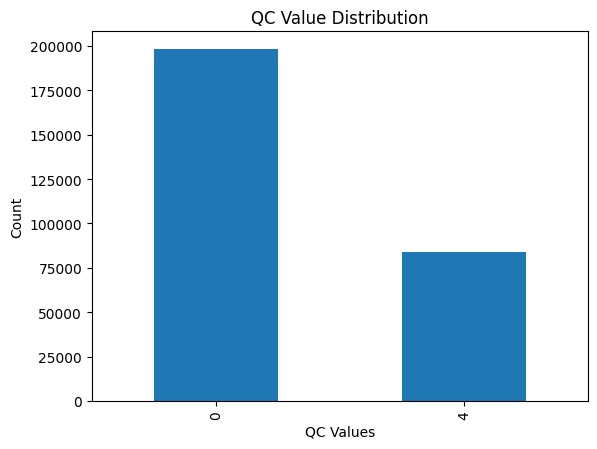

PR_PF_4903059.csv 285724
low quality data precentage: 69.4712379779%
high quality data precentage: 30.5287620221%


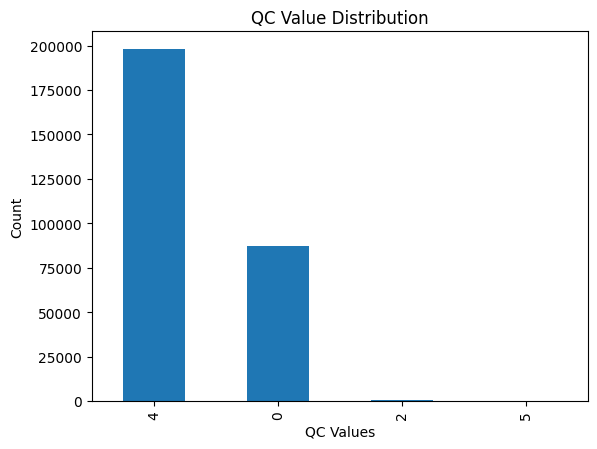

In [11]:
# input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        flag_qc(df)
        flag_label(df)
        allqc(df)
        oneqc(df)
        df.to_csv(file_path, index=False)
        plot_qc_distribution(df)

In [12]:
#check when TEMP_QC=3 whether PSAL_QC=3
def check_column_values(df):
    mask = df['TEMP_QC'].isin([3, 4])
    filtered_df = df.loc[mask]
    result = filtered_df['PSAL_QC'].isin([3,4]).all()

    return result

In [13]:
# input_path = './dataset1/'
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        re=check_column_values(df)
        print(re)

PR_PF_4902338.csv 205377
True
PR_PF_4903218.csv 278362
True
PR_PF_4902919.csv 275911
True
PR_PF_4902100.csv 112696
True
PR_PF_4903220.csv 281402
True
PR_PF_4902911.csv 150254
True
PR_PF_4903216.csv 280370
True
PR_PF_4902337.csv 214897
True
PR_PF_4903217.csv 282147
True
PR_PF_4903059.csv 285724
True


In [14]:
def dis(df):
    fig, ax = plt.subplots(figsize=(16, 4),dpi=600)
    # 设置x轴的日期格式和间隔
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    sns.scatterplot(x='DATE (YYYY-MM-DDTHH:MI:SSZ)', y='QC', hue='QC', data=df, palette='Set1')
    plt.title('QC Distribution')
    plt.show()
    

PR_PF_4902338.csv


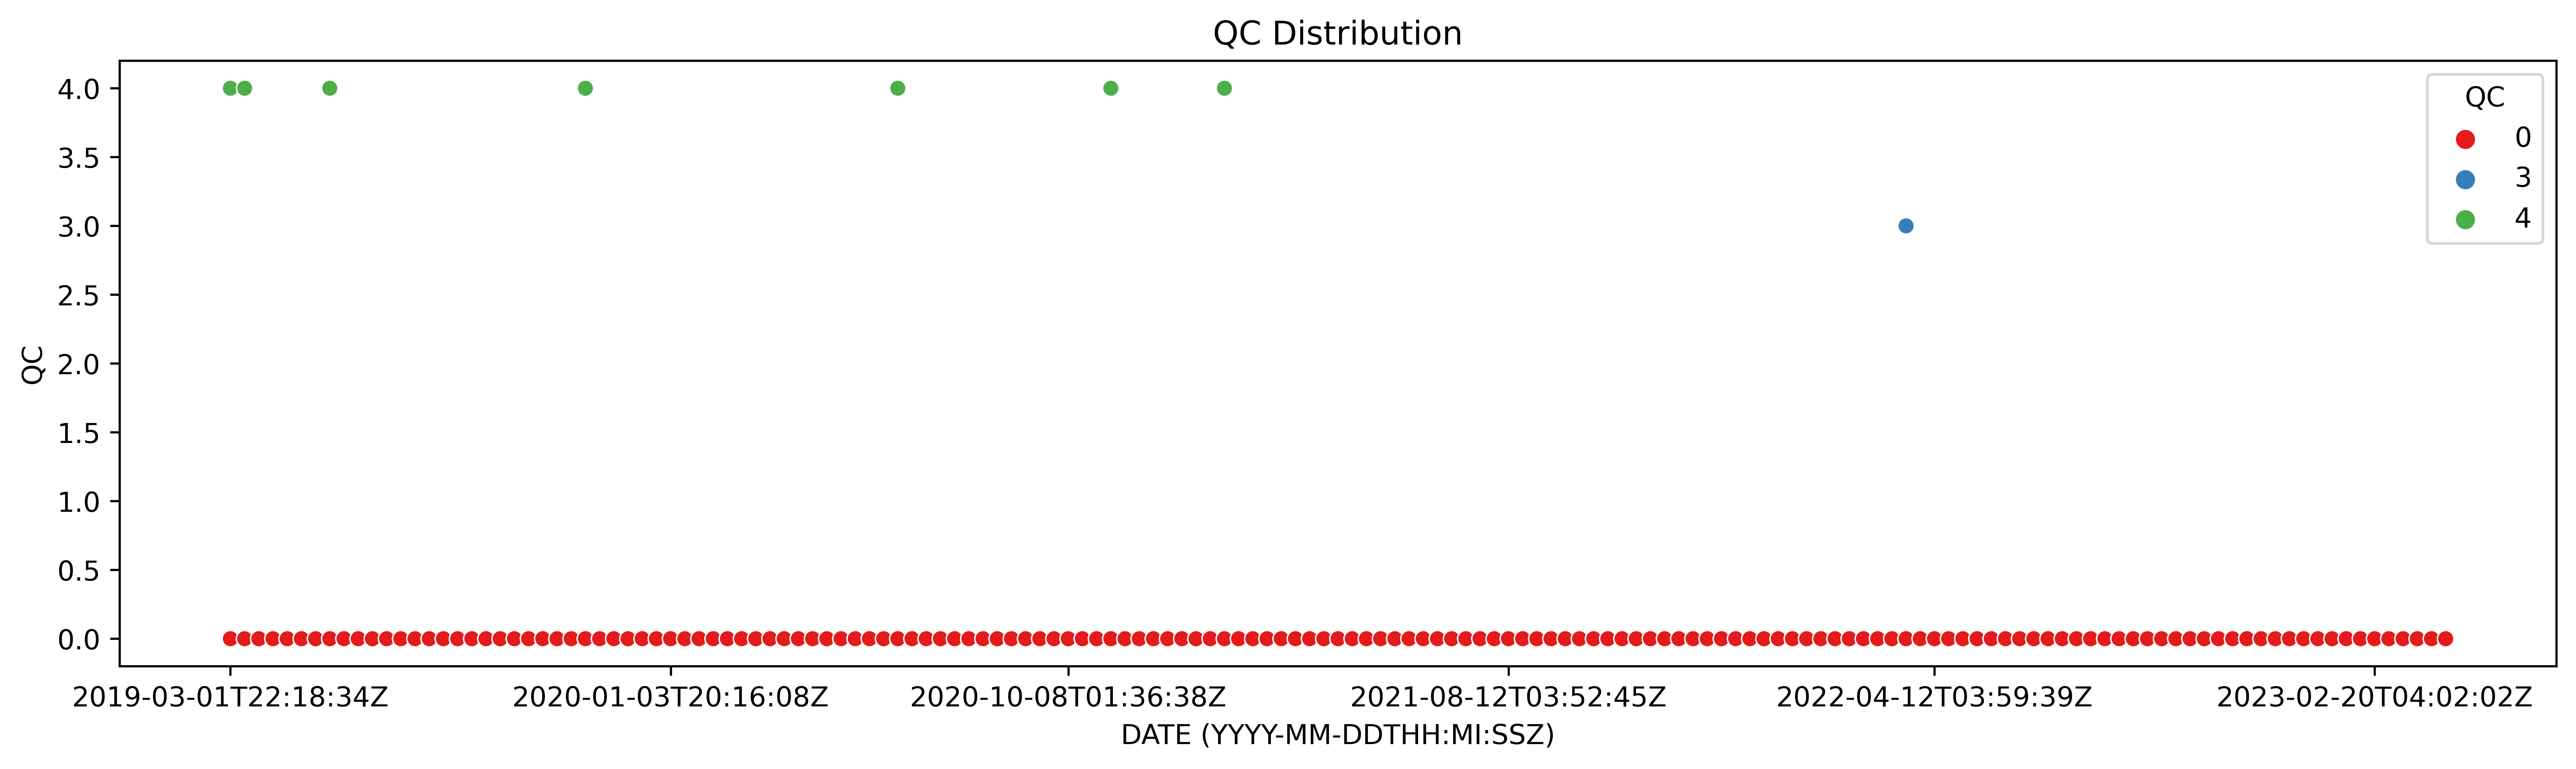

PR_PF_4903218.csv


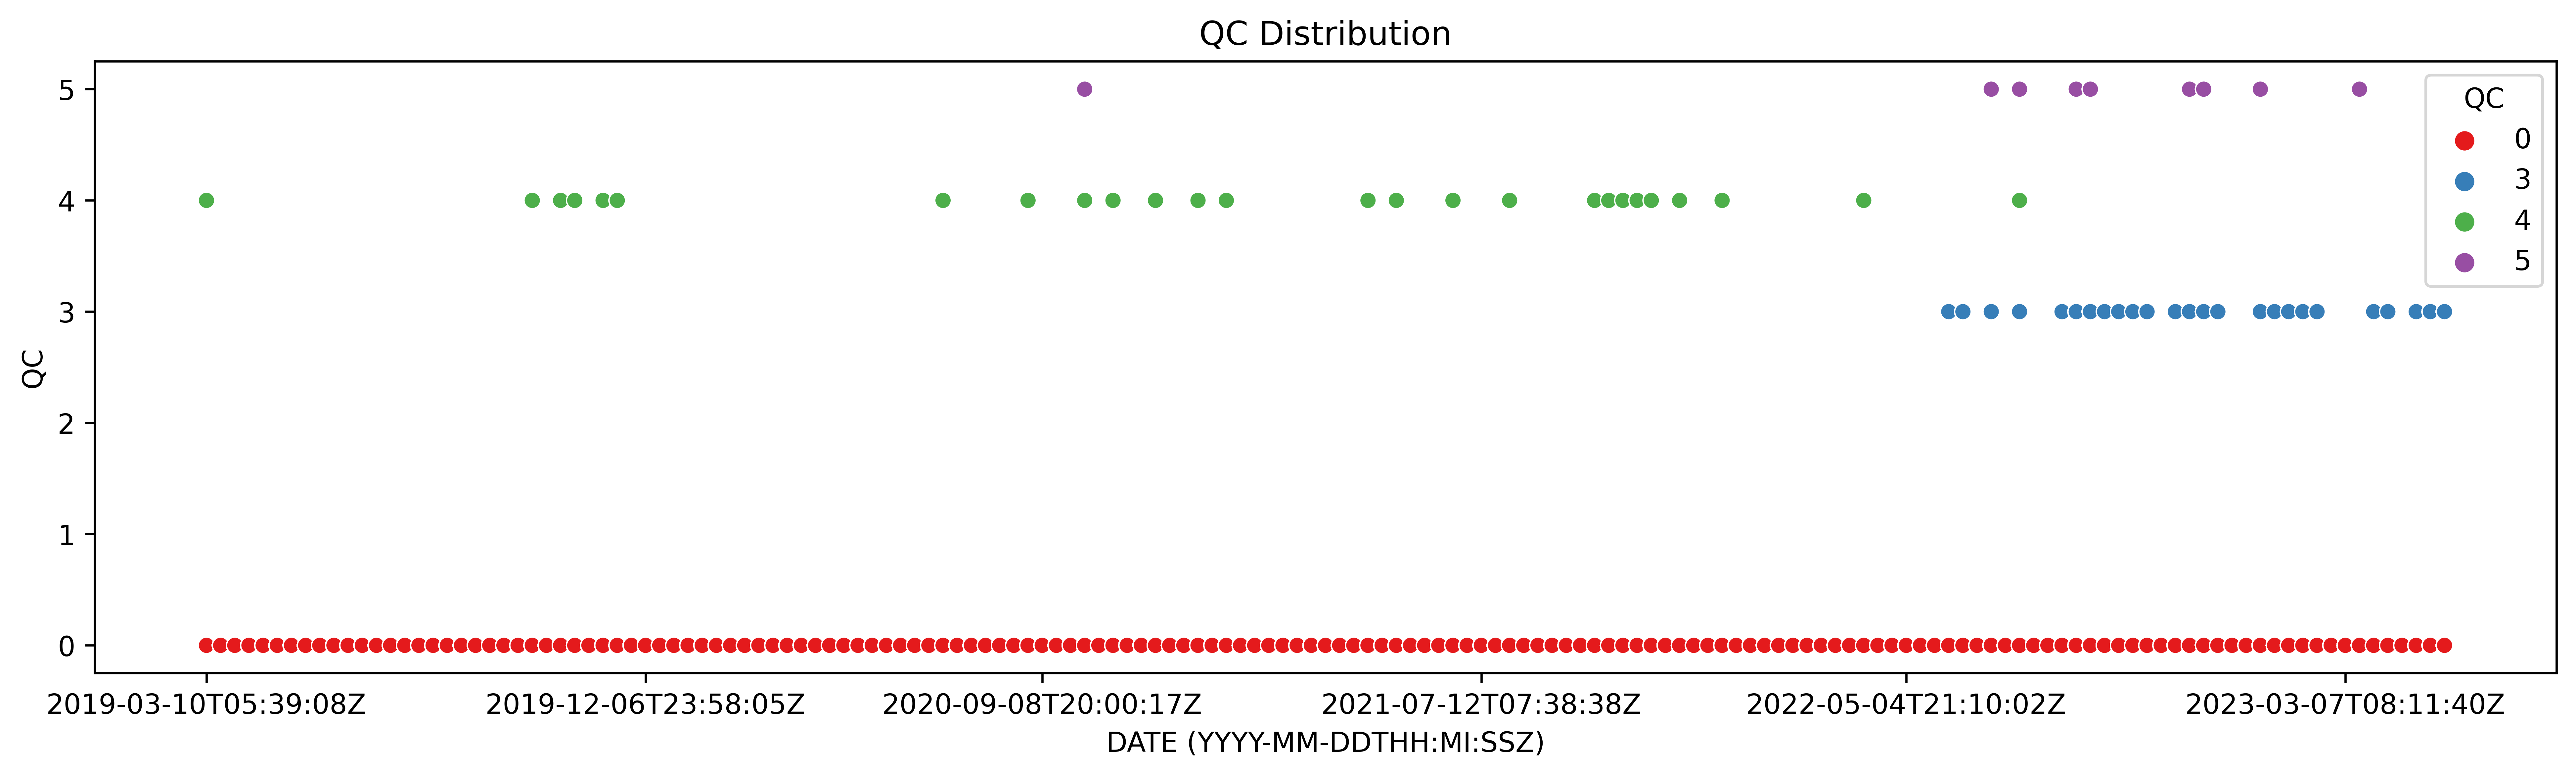

PR_PF_4902919.csv


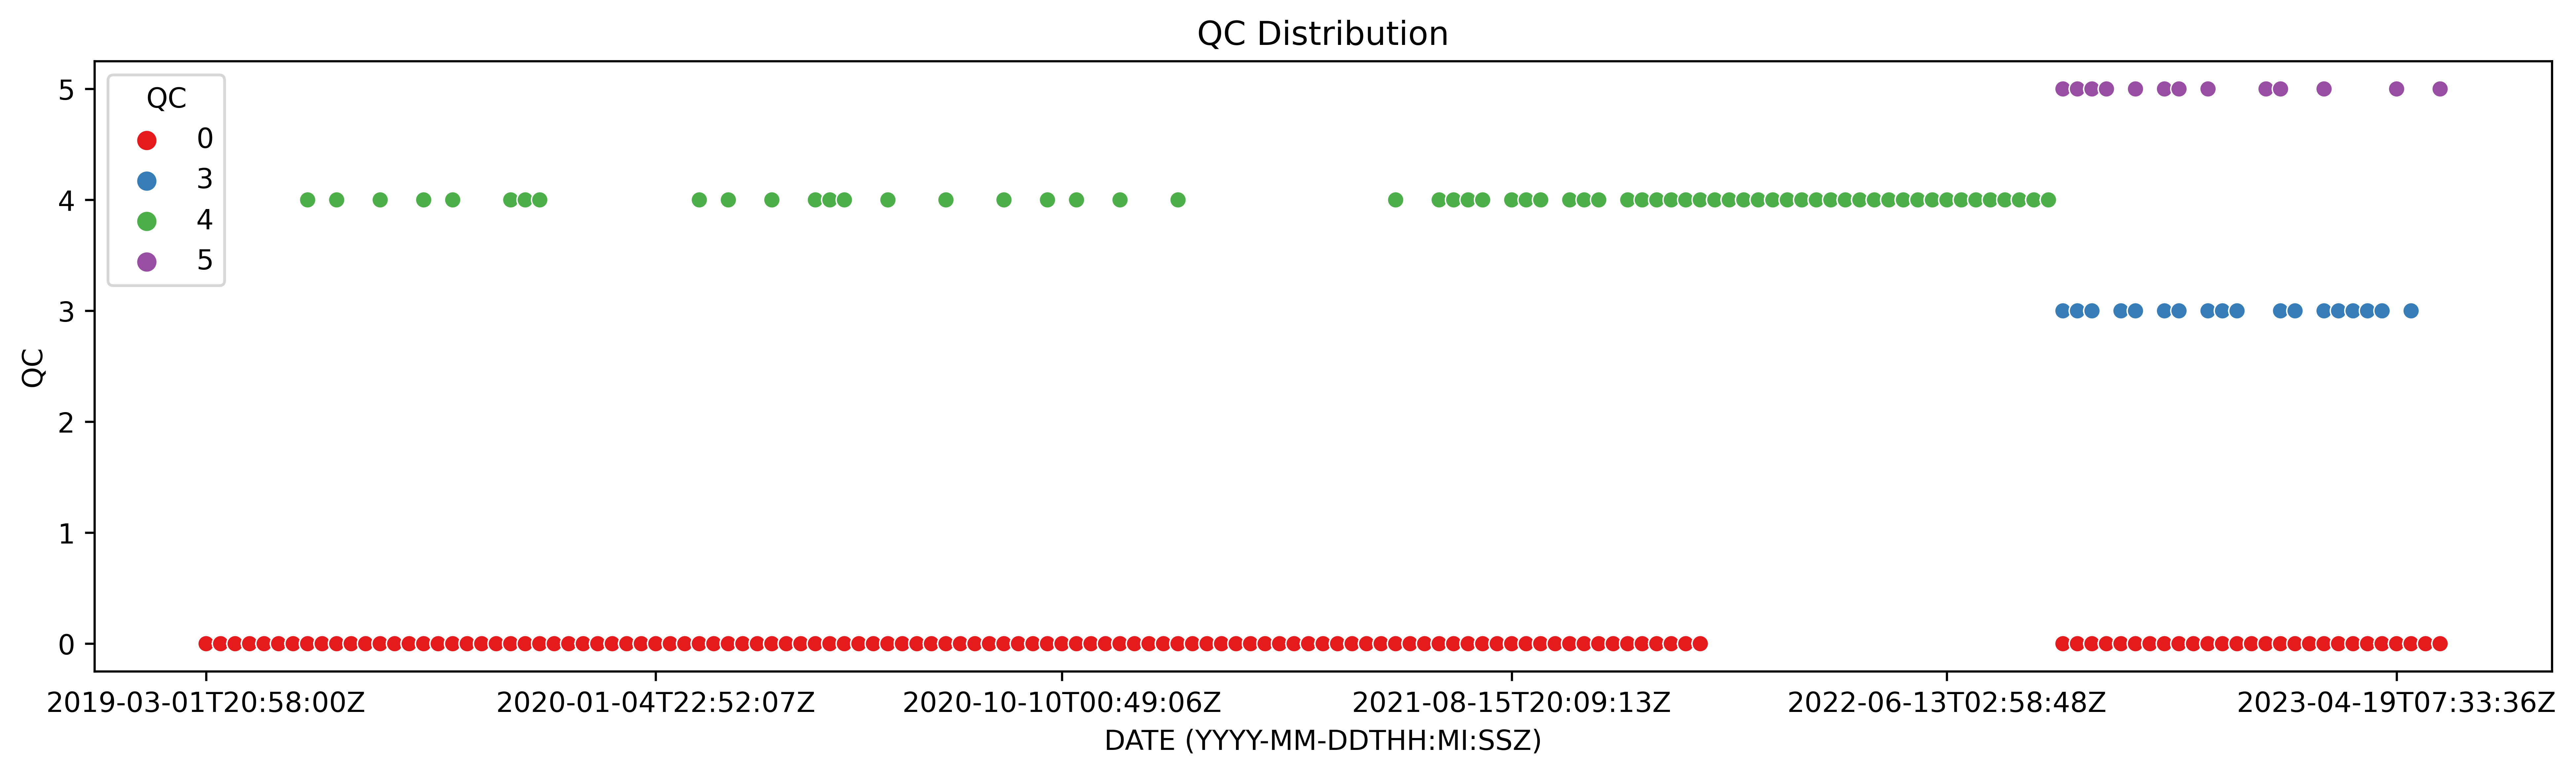

PR_PF_4902100.csv


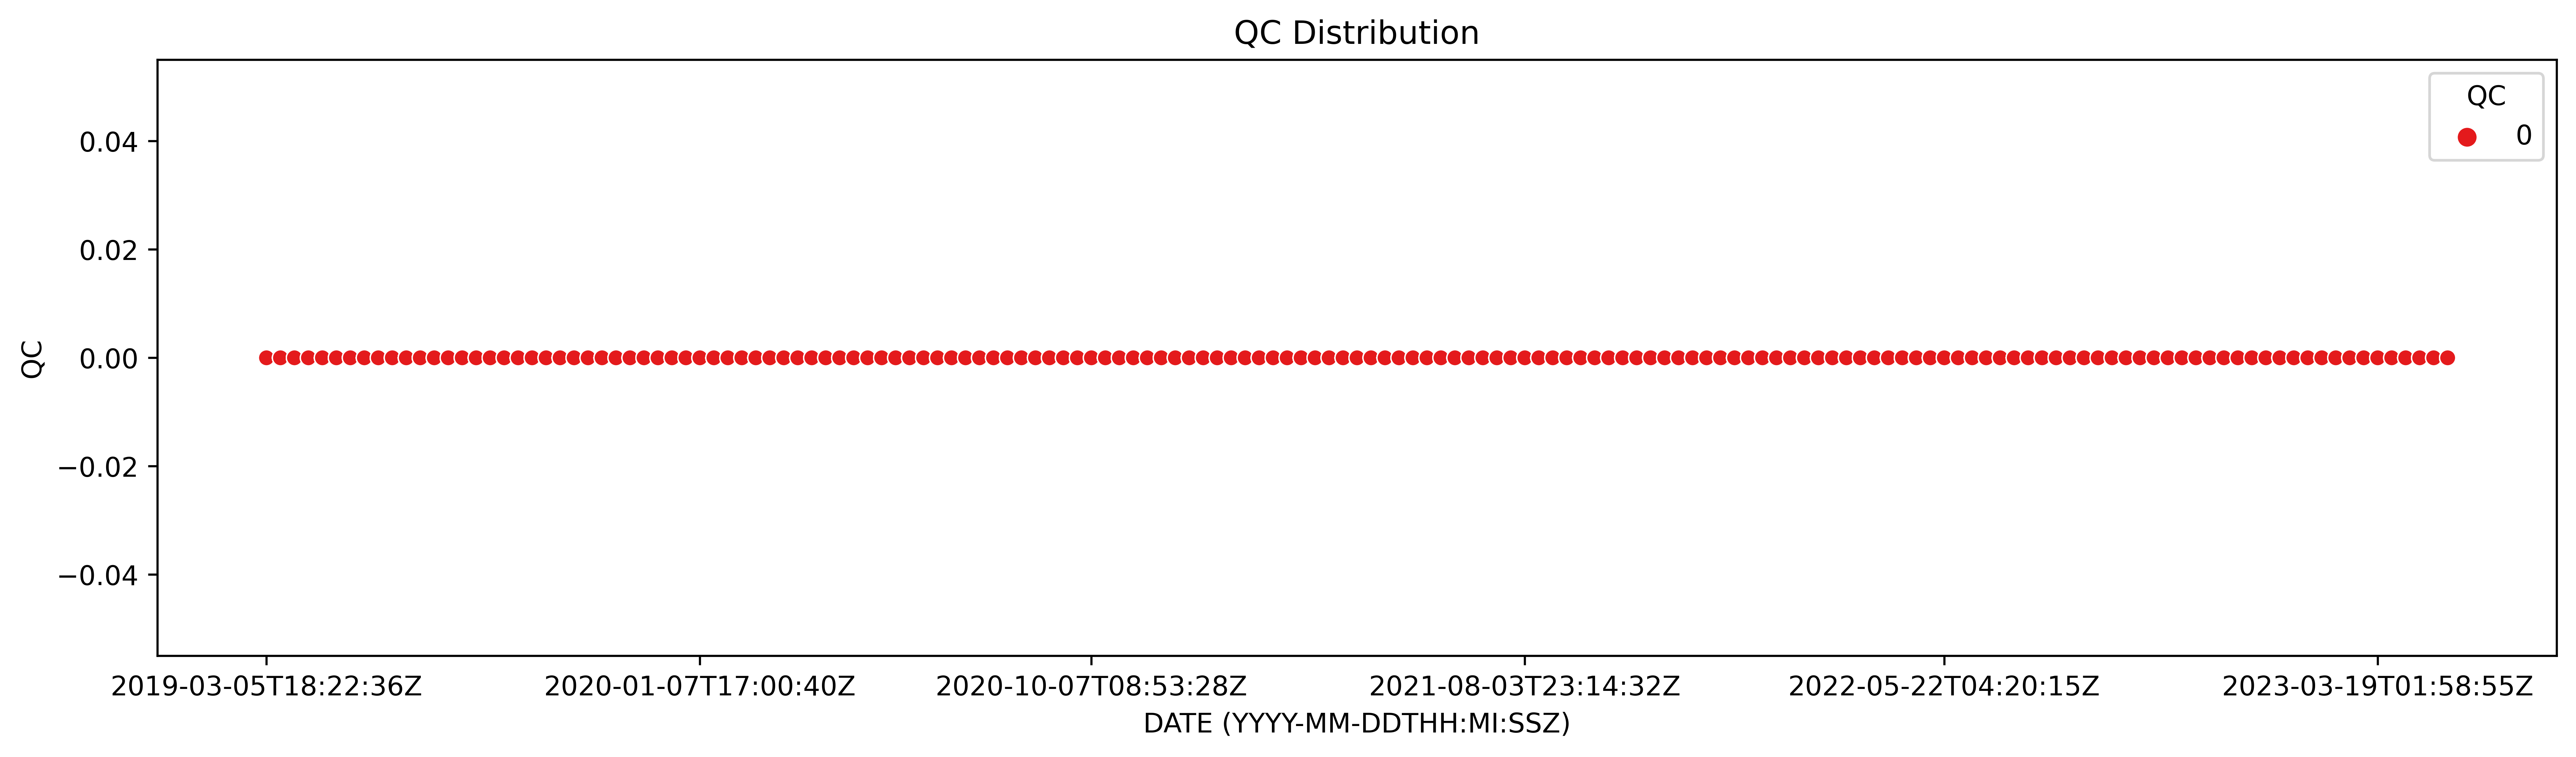

PR_PF_4903220.csv


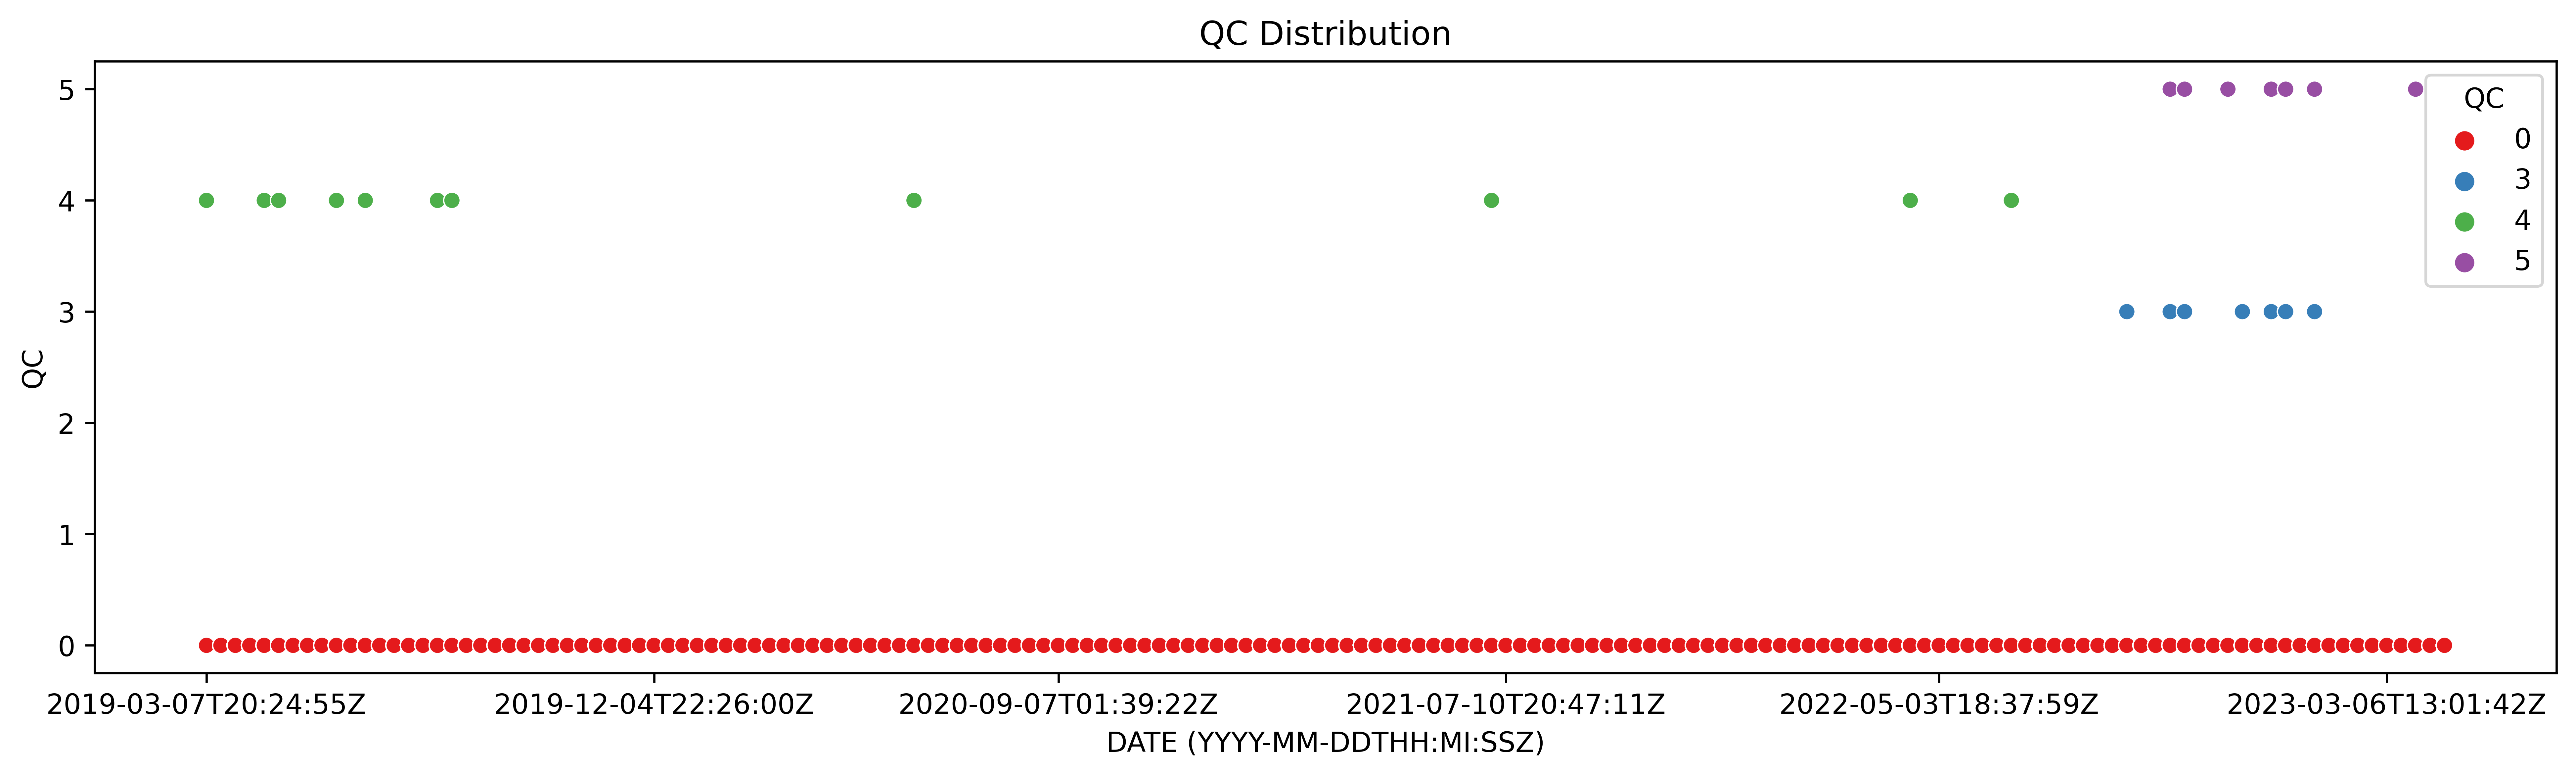

PR_PF_4902911.csv


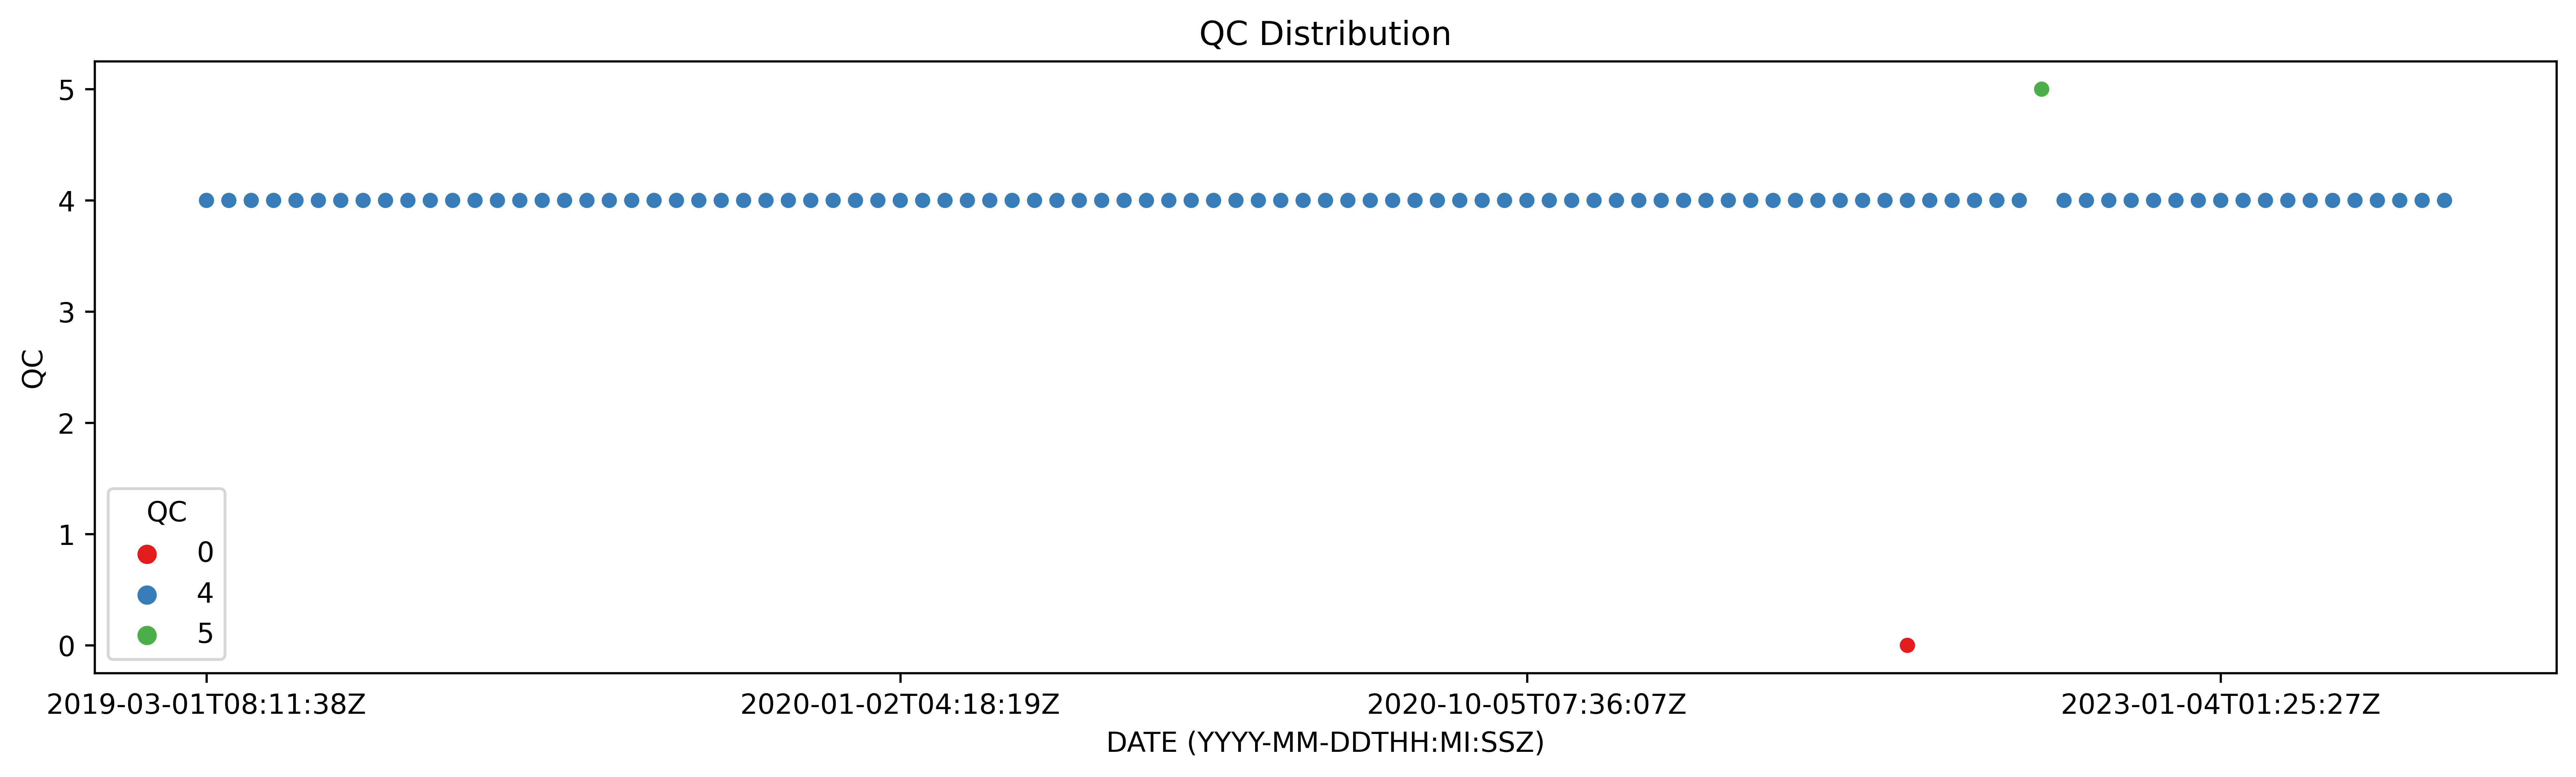

PR_PF_4903216.csv


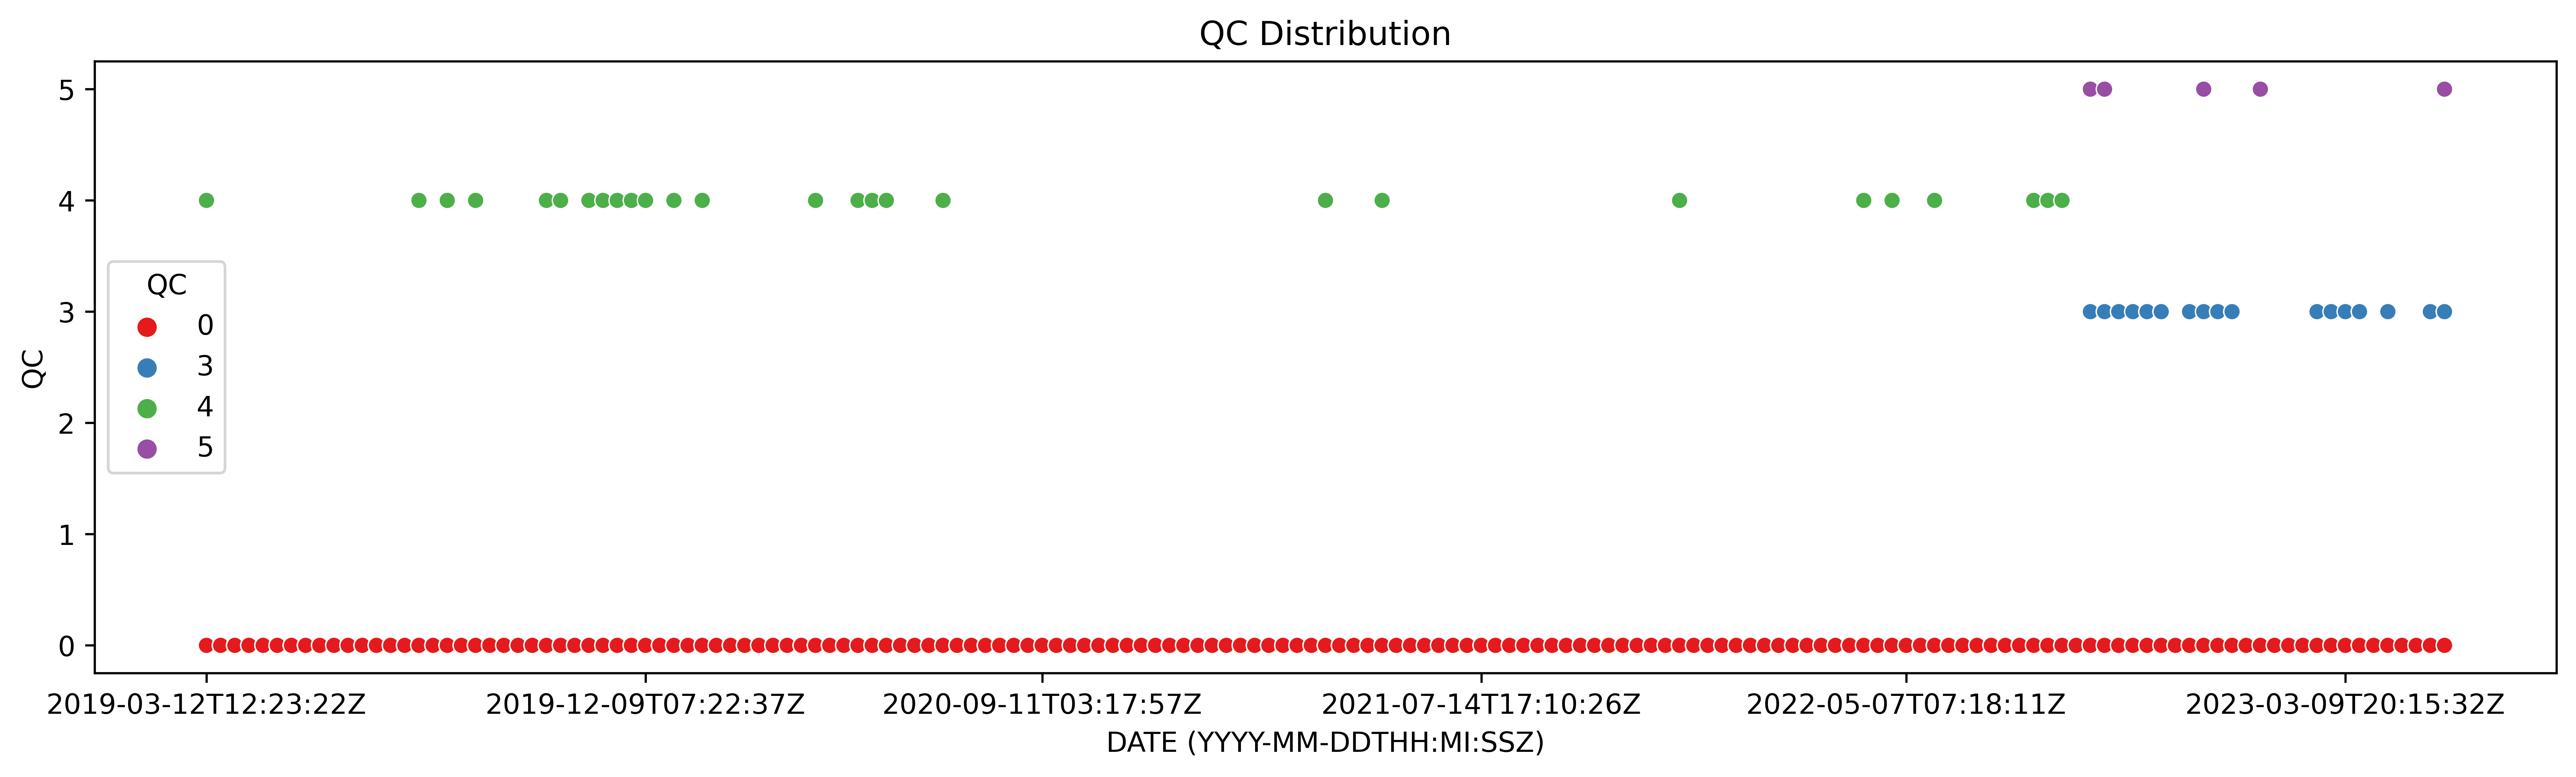

PR_PF_4902337.csv


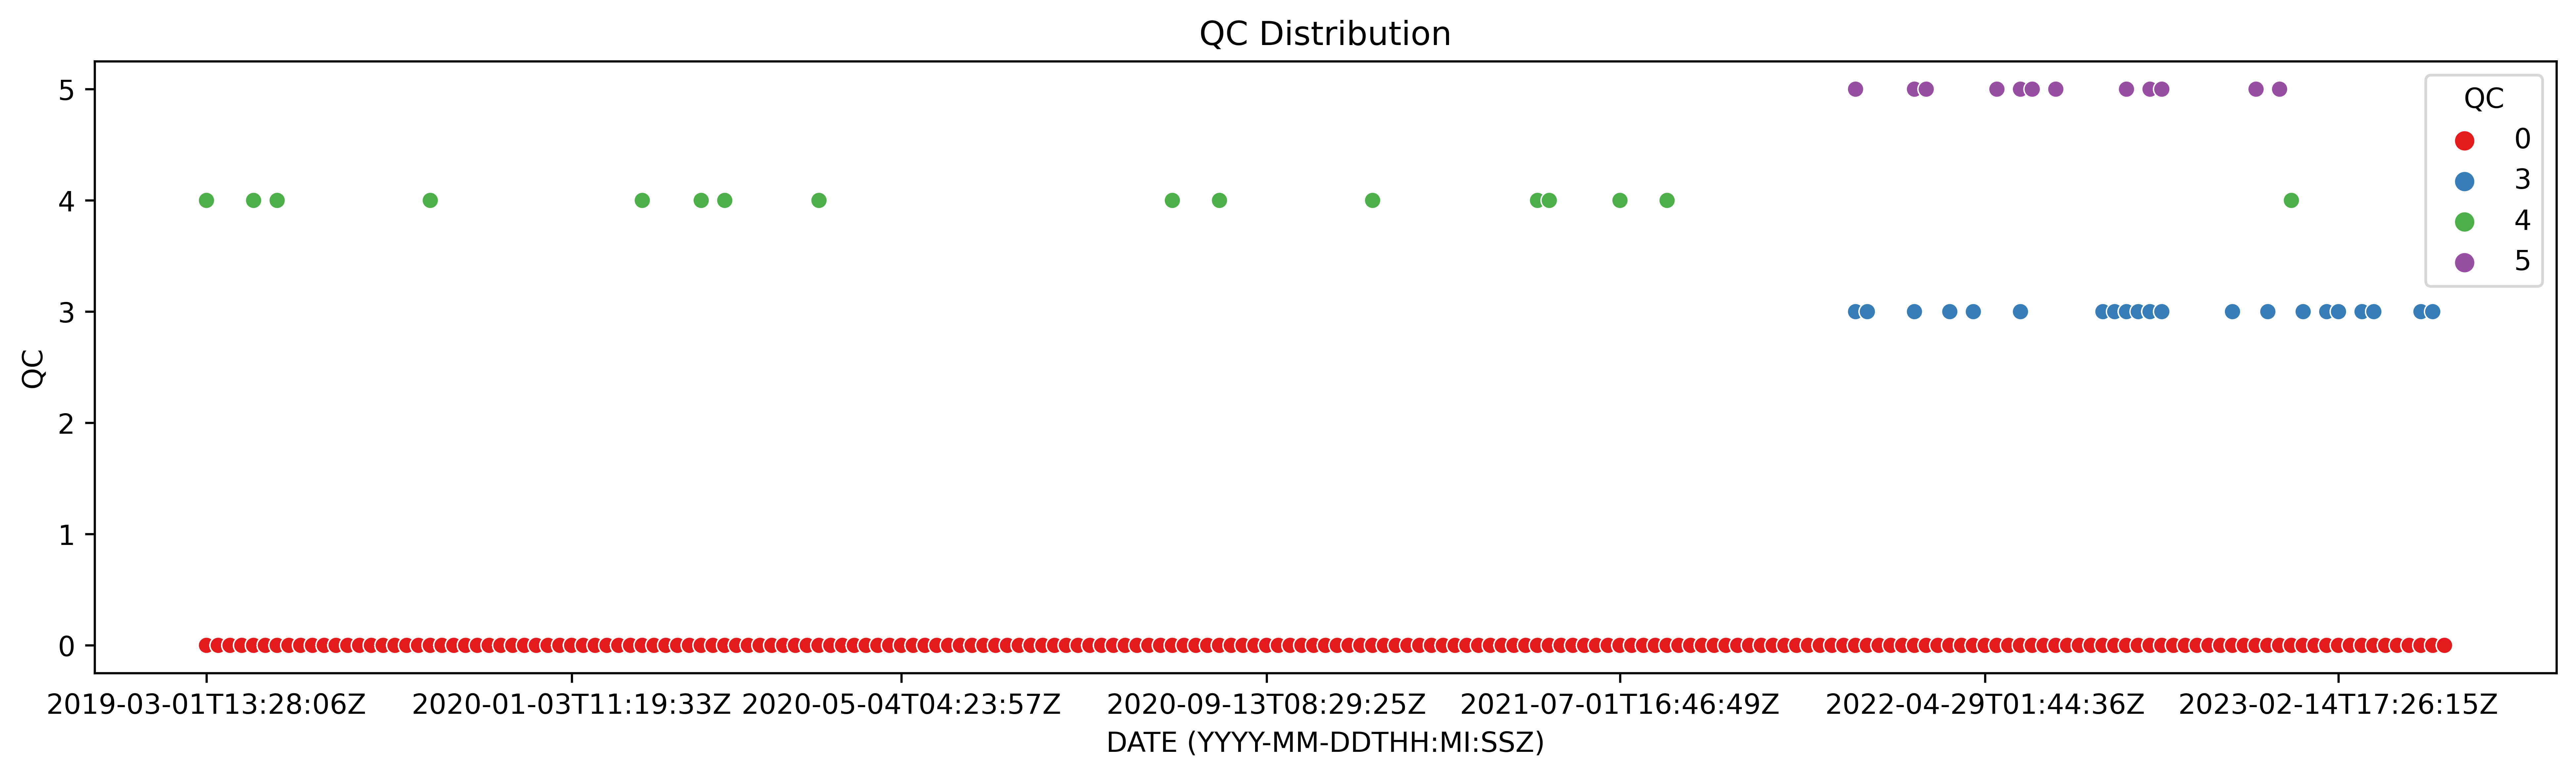

PR_PF_4903217.csv


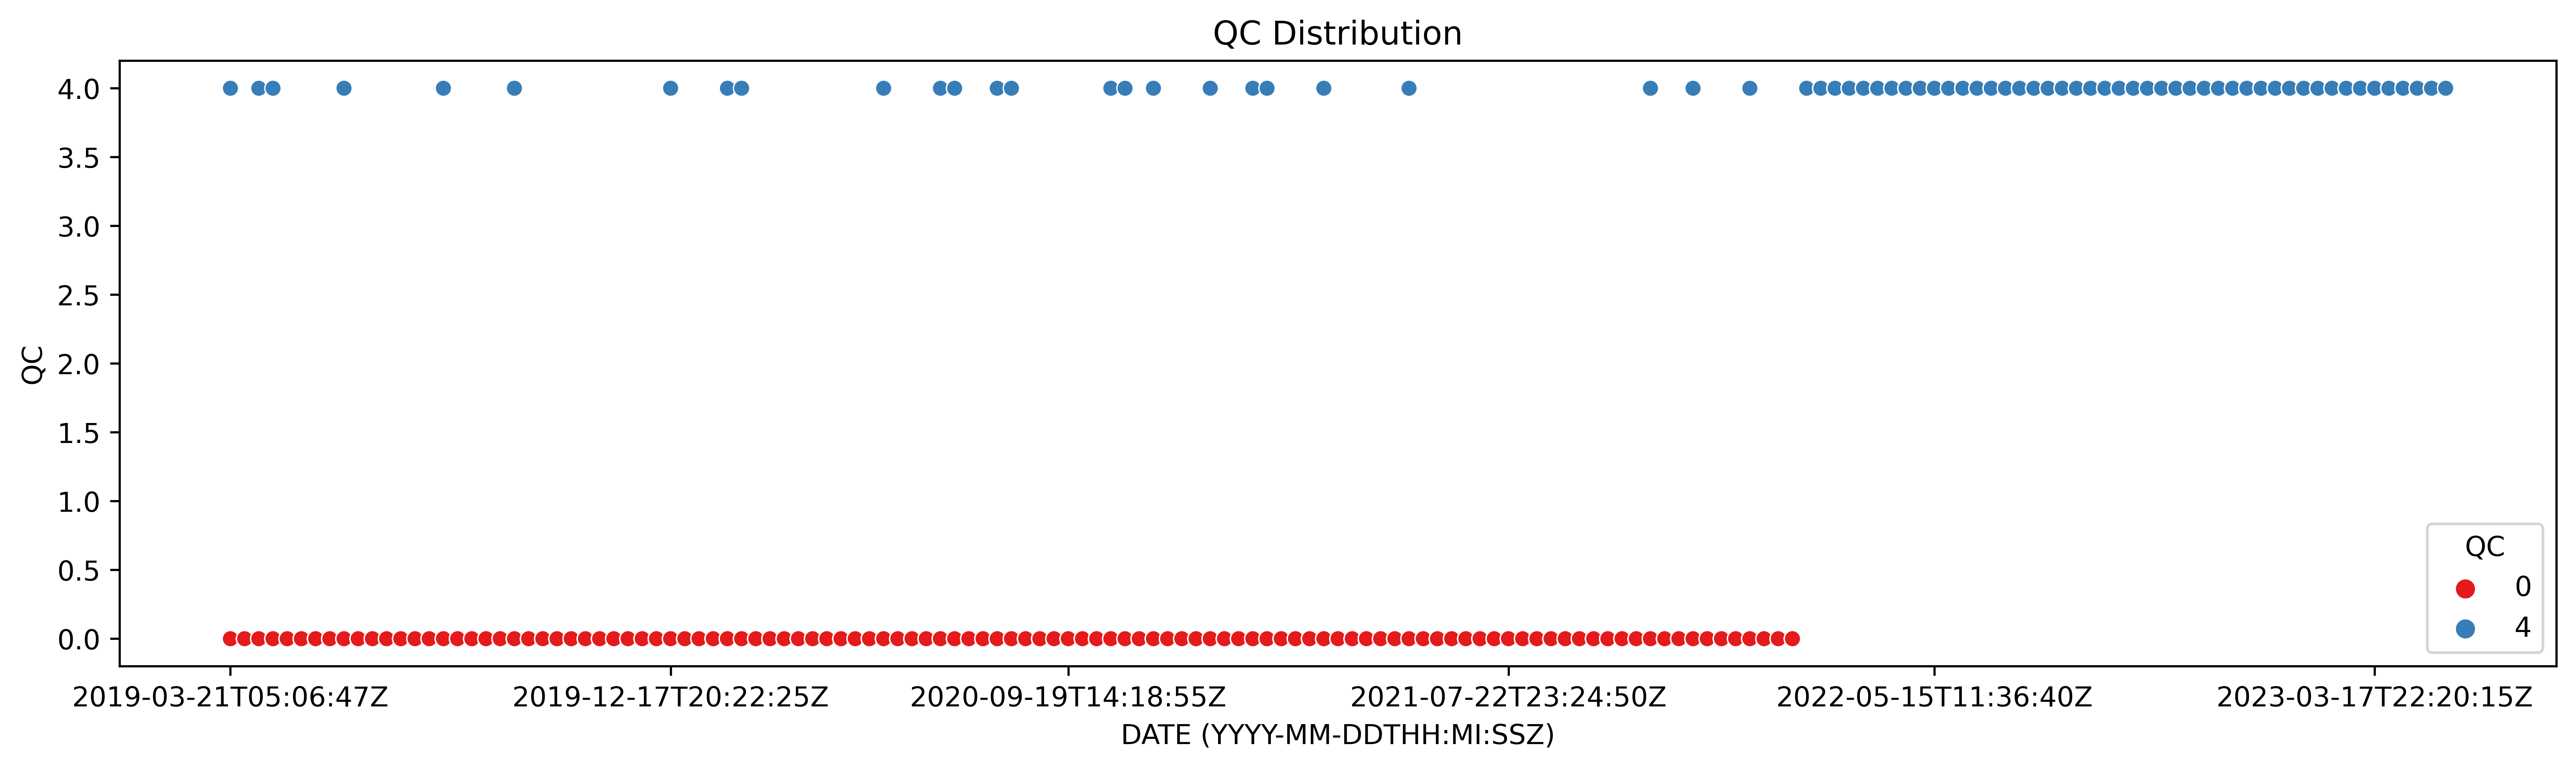

PR_PF_4903059.csv


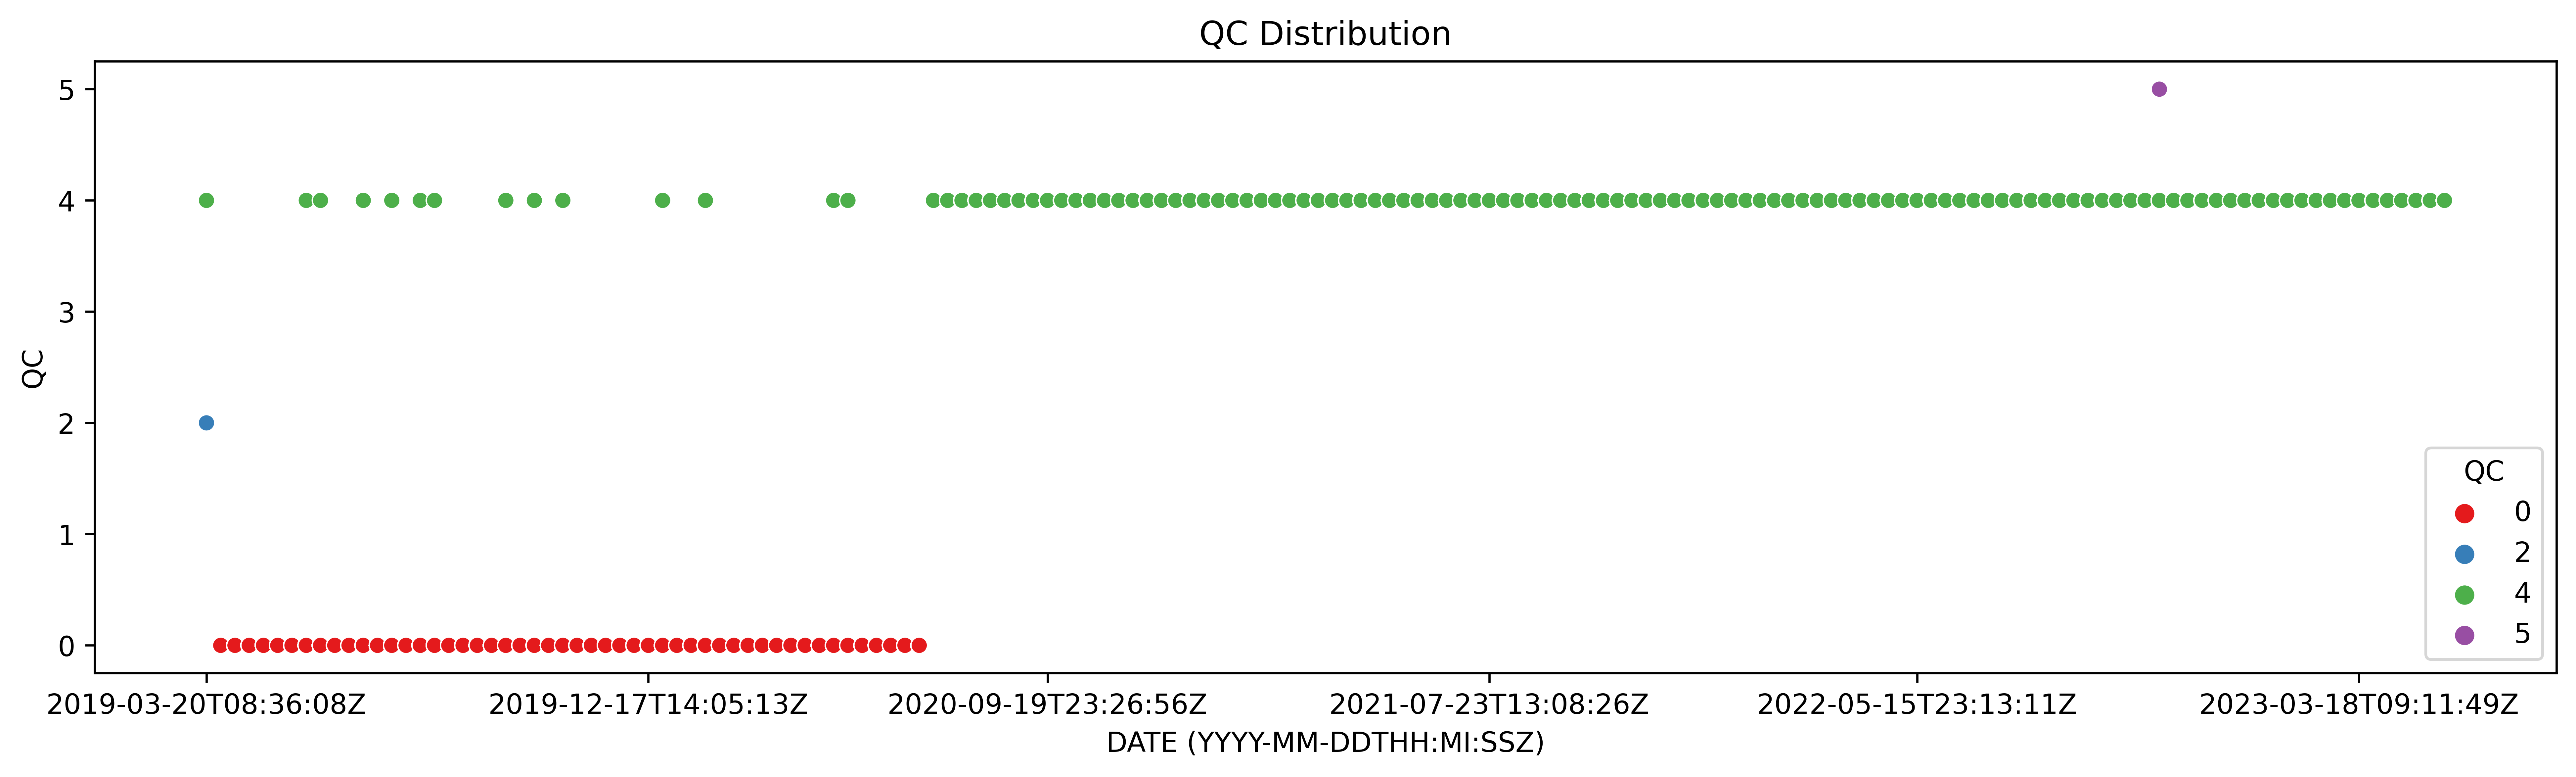

In [15]:
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename)
        dis(df)

# normalization, feature engineering 

In [16]:
#drop and Normalization 
def pre(data):
    data = data.drop(['DATE_QC', 'POSITION_QC','PRES_QC', 'PSAL_QC', 'TEMP_QC'], axis=1)
    data = data.rename(columns={'DATE (YYYY-MM-DDTHH:MI:SSZ)': "Date",'LATITUDE (degree_north)':'Latitude','LONGITUDE (degree_east)':'longitude',
                               'PRES (decibar)':'Pressure',  'PSAL (psu)':'Salinity' ,'TEMP (degree_Celsius)':'Temperature'})
    data['Date'] = pd.to_datetime(data['Date'])
    data['Date'] = pd.DatetimeIndex(data['Date']).astype(int) // 10**9
    #normalization
    row,col=data.shape
    df=data.copy()
    for i in range(0,col-2):
        mean = data.iloc[:,i].mean()
        std = np.std(data.iloc[:,i])
        df.iloc[:,i] = data.iloc[:,i].apply(lambda x: (x - mean) / std)
        #print(df)
    return df

In [17]:
file_paths = [os.path.join(input_path, f) for f in os.listdir(input_path) if f.endswith('.csv')]

for filename in os.listdir(input_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(input_path, filename)
        df = pd.read_csv(file_path)
        print(filename,len(df))
        df=pre(df)
        print(df)
        df.to_csv('./dataset/'+filename, index=False)
        #plot_qc_distribution(df)

PR_PF_4902338.csv 205377
            Date  Latitude  longitude  Pressure  Salinity  Temperature  QC  \
0      -1.700435  2.802834  -1.482120 -1.018314  0.506205     0.480496   0   
1      -1.700435  2.802834  -1.482120 -1.016756  0.505108     0.480496   0   
2      -1.700435  2.802834  -1.482120 -1.015198  0.505108     0.480496   0   
3      -1.700435  2.802834  -1.482120 -1.013640  0.506205     0.480496   0   
4      -1.700435  2.802834  -1.482120 -1.011770  0.506205     0.480496   0   
...          ...       ...        ...       ...       ...          ...  ..   
205372  1.856256 -0.966344   0.955218 -0.950815  1.489025     1.024262   0   
205373  1.856256 -0.966344   0.955218 -0.950628  1.490122     1.024262   0   
205374  1.856256 -0.966344   0.955218 -0.950441  1.489025     1.024386   0   
205375  1.856256 -0.966344   0.955218 -0.950254  1.490122     1.024262   0   
205376  1.856256 -0.966344   0.955218 -0.950067  1.489025     1.024262   0   

        Label  
0           0  
1     

PR_PF_4902337.csv 214897
            Date  Latitude  longitude  Pressure  Salinity  Temperature  QC  \
0      -1.585365 -1.728530   0.521569 -0.879497  1.262182     0.821075   0   
1      -1.585365 -1.728530   0.521569 -0.877652  1.262182     0.821075   0   
2      -1.585365 -1.728530   0.521569 -0.875877  1.262182     0.821075   0   
3      -1.585365 -1.728530   0.521569 -0.874102  1.262182     0.821075   0   
4      -1.585365 -1.728530   0.521569 -0.872327  1.262182     0.820935   0   
...          ...       ...        ...       ...       ...          ...  ..   
214892  1.974275 -1.605371  -0.343140 -0.800836  1.282260     1.124030   0   
214893  1.974275 -1.605371  -0.343140 -0.800623  1.282260     1.123890   0   
214894  1.974275 -1.605371  -0.343140 -0.800339  1.281203     1.123750   0   
214895  1.974275 -1.605371  -0.343140 -0.800197  1.283317     1.123610   0   
214896  1.974275 -1.605371  -0.343140 -0.799984  1.283317     1.123049   0   

        Label  
0           0  
1     